<a href="https://colab.research.google.com/github/aggelospsiris/Text-classification-using-neural-networks/blob/main/mse/hidden_o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import re
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.model_selection import KFold
from keras import backend as K
import keras
from tensorflow import keras
from matplotlib import pyplot


In [3]:
#labels into vectors array
Y_train_labels = np.loadtxt("/content/sample_data/train-label.dat")


In [4]:
#A1.preproccesing and prepare data
#a.encode the input using bag of words
#newline will have only the int numbers
newlines = []
with open('/content/sample_data/train-data.dat', 'r') as f:
    lines = f.readlines()
    for line in lines:
        # in every line erase any occurance that starts with < and ends with > with
        newline = re.sub("\<[^>]*\>", "", line)
        newlines.append(newline)

vocab = list(range(0, 8251))
vects = []
vect = []
count = 0
i = 0
for line in newlines:
    fraze = line.split()
    fraze = [int(x) for x in fraze]
    for v in vocab:
        for f in fraze:
            if(v == f):
                count = count +1
        vect.append(count)
        count = 0
    vects.append(vect)
    vect = []

X_train = np.array(vects)

In [5]:
#b.normalisation
X_normalized = preprocessing.normalize(X_train, norm='max')

In [6]:
#c.cross-validation
# Split the data to training and testing data 5-Fold
kfold = KFold(n_splits=5, shuffle=True)
acc_list = []
rmseList = []
ce_list = []


a)CE vs mse:


*   Comparing the values of MSE & cross-entropy loss and saying that one is lower than the other is like comparing apples to oranges

*   MSE is for regression problems, while cross-entropy loss is for classification ones; these contexts are mutually exclusive, hence comparing the numerical values of their corresponding loss measures makes no sense

*   When your prediction vector is like [0,0.1,0.2,....1] (i.e. with non-integer components), as you say, the problem is a regression (and not a classification) one; in classification settings, we usually use one-hot encoded target vectors, where only one component is 1 and the rest are 0

*   A target vector of [1,1,1,1....1] could be the case either in a regression setting, or in a multi-label multi-class classification, i.e. where the output may belong to more than one class simultaneously

Source:https://stackoverflow.com/questions/49322197/comparing-mse-loss-and-cross-entropy-loss-in-terms-of-convergence

b)For the number of neurons in the output,i will need 20 neurons on the output layer as much as the classes 

c)For the hidden layer ReLu because accelerates the convergence of gradient descent towards the global minimum of the loss function due to its linear, non-saturating property,also i dont have the they dying problem beacuse my inputs are all above zero 

d)On the output layer i am using sigmoid 
activation function because i have a multiple classification problem and i want my outputs to be either 0 or 1.If i had just one label for each input i would use Softmax

In [24]:
for i, (train, test) in enumerate(kfold.split(X_normalized)):
    # Create model
    model = Sequential()
    #hidden layers =  outputs
    model.add(Dense(units = 20, activation="relu", input_dim=len(X_normalized[0])))
    model.add(Dense(units = 20, activation='sigmoid'))

    opt = keras.optimizers.SGD(learning_rate=0.001,momentum=0.0, nesterov=False, name="SGD")
    model.compile(loss=keras.losses.mse, 
                  optimizer=opt, metrics=['accuracy'])

    # Fit model
    history = model.fit(X_normalized[train], Y_train_labels[train], epochs=50, batch_size=100, verbose=0)
    print("Fold:",i)
    # Evaluate model
    scores= model.evaluate(X_normalized[test], Y_train_labels[test], verbose=2)
    ce_list.append(scores[0])

	  



Fold: 0
52/52 - 0s - loss: 0.2421 - accuracy: 0.0806 - 246ms/epoch - 5ms/step
Fold: 1
52/52 - 0s - loss: 0.2416 - accuracy: 0.0782 - 257ms/epoch - 5ms/step
Fold: 2
52/52 - 0s - loss: 0.2408 - accuracy: 0.1133 - 253ms/epoch - 5ms/step
Fold: 3
52/52 - 0s - loss: 0.2427 - accuracy: 0.0618 - 258ms/epoch - 5ms/step
Fold: 4
52/52 - 0s - loss: 0.2444 - accuracy: 0.1182 - 338ms/epoch - 6ms/step


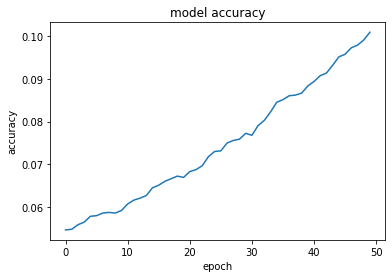

In [25]:
pyplot.plot(history.history['accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.show()


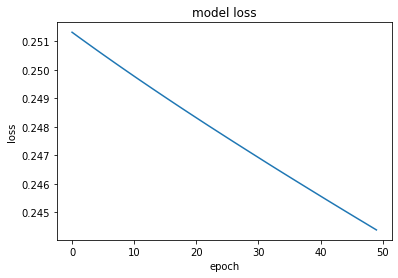

In [26]:
pyplot.plot(history.history['loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.show()